<a href="https://colab.research.google.com/github/CogGal/CogGal/blob/master/StatMethodsPsy20_Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2 - Hypothesis testing - How to separate between two distributions?


In [ ]:
#@title Imports
import pandas as pd
import seaborn as sns
import numpy as np
import random
import io
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sns.set(style="white", palette="muted", color_codes=True)
sns.set(rc={'figure.figsize':(10,10)});
sns.set_context("talk")


def plot_dist(dist, bins="auto", kde=False, fit="None", color="b", stat="density",height=8, aspect=1):
  #for frequency - set stat to "count"
  #aspect*height=width
  plt.figure(0)
  sns.displot(dist, kde=kde,bins=bins,stat=stat,color=color,height=height, aspect=aspect);
  if (fit=="Normal") & (stat=="density"):  
    d = stats.norm.fit(dist)
    mu = d[0]; sigma = d[1]
    x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 200) #limits of dist
    plt.plot(x, stats.norm.pdf(x, mu, sigma),color="black");
  elif (fit=="F") & (stat=="density"):  
    d = stats.f.fit(dist)
    dfn = d[0]; dfd = d[1]
    interval = stats.f.interval(.995,dfn,dfd) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.f.pdf(x, dfn, dfd),color="black");
  elif (fit=="gamma") & (stat=="density"):  
    d = stats.gamma.fit(dist)
    a = d[0]; loc = d[1]; scale = d[2]
    interval = stats.gamma.interval(.995,a,loc,scale) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.gamma.pdf(x, a, loc, scale),color="black");

In [ ]:
#@title Data imports
#urlHeight='https://raw.githubusercontent.com/uvhart/StatPsyMethods/master/StatMethodsPsy-Lec1.csv'
#data = pd.read_csv(urlHeight)

# Slide 1: Introduction

## Now that we know what a distribution is - we would like to know whether the sample we have behaves like we expect it to.

## We will have two different cases causing this need:
## a.   We have two groups and we want to know if they are the same or not (one group took the red pill and the other group took the blue pill).
## b. We have one group and we want to know if they behave like a certain model that can explain their behavior (Mind reading abilities versus guessing).

## Note that in real life we have samples and not distributions, so how can we separate between two different samples? Are they the same or not?

## Question 1: What is the important parameter to differentiate between two distributions:
### A. The number of observations we take from each distribution, duh
### B. Of course it is the difference between their means
### C. It depends on the variance of each distribution
### D. All of the above, classic answer

# Slide 2: Let's build some intuition about what it takes to separate two distributions

# Slide 3: We'll start by thinking about how many observations we need to take from each group

# Slide 4: There are two jars, each has 100 balls in it - one jar has a majority of red balls and the second jar has a majority of blue balls. One covered jar is put in front of us and we need to sample balls and decide whether the jar in front of us is the red jar or the blue jar.

# Slide 5: First example: The red jar has 90 red balls - 10 blue balls, and the blue jar has 90 blue balls - 10 red balls

In [ ]:
#@title 1000 samples from both jars - distribution of the amount of red balls 
# Example of discriminating red balls and blue balls from a jar:
# First example: 90 blue-10 red vs 90 red-10 blue (show distributions of repeated sampling from each jar - 1/5/10/25/50/75 samples per jar)

def jars90_10(size=5):
  np.random.seed(1)
  redblue = np.array(["red","blue"])
  redJar = np.repeat(redblue, [90,10], axis=0)
  blueJar = np.repeat(redblue, [10,90], axis=0)

  nreps= 1000
  sizes= np.array([1,5,10,25,50,75])
  i=0 #count


  nred= np.array([])  ##will include the distribution of percentage of red balls in sample
  nblue= np.array([])
  for rep in range(nreps):
        sampleRed = np.random.choice(redJar, size, replace=False)
        sampleBlue = np.random.choice(blueJar, size, replace=False)
      ##calculating percentage of red balls in the sample
        redinRed = len([red for red in sampleRed if red == "red"])/len(sampleRed);
        redinBlue = len([red for red in sampleBlue if red == "red"])/len(sampleBlue);
        nred = np.append(nred, [redinRed]);
        nblue = np.append(nblue, [redinBlue]);
  plt.figure(0,figsize=(8,4))
  sns.histplot(nred, kde=False, bins = int(50/size+3), color="red");
  plt.xlabel("% of red balls in the red jar sample");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)
  plt.figure(1,figsize=(8,4))
  sns.histplot(nblue, kde=False,bins = int(50/size+3), color="blue");
  plt.xlabel("% of red balls in the blue jar sample");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)

  plt.figure(2,figsize=(8,4))
  sns.histplot(nblue, kde=False, bins = int(50/size+3), color="blue");
  sns.histplot(nred, kde=False, bins = int(50/size+3), color="red");
  plt.xlabel("% of red balls in the both samples");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)
_=interact(jars90_10,size=(2,100))

interactive(children=(IntSlider(value=5, description='size', min=2), Output()), _dom_classes=('widget-interact…

#Slide 6: Second example: The red jar has 70 red balls - 30 blue balls, and the blue jar has 70 blue balls - 30 red balls

In [ ]:
#@title 1000 samples from both jars - distribution of the amount of red balls 
# Example of discriminating red balls and blue balls from a jar:
# Second example: 70 blue-30 red vs 70 red-30 blue (show distributions of repeated sampling from each jar - 1/5/10/25/50/75 samples per jar)


def jars70_30(size=5):
  np.random.seed(1)
  redblue = np.array(["red","blue"])
  redJar = np.repeat(redblue, [70,30], axis=0)
  blueJar = np.repeat(redblue, [30,70], axis=0)

  nreps= 1000
  sizes= np.array([1,5,10,25,50,75])
  i=0 #count


  nred= np.array([])  ##will include the distribution of percentage of red balls in sample
  nblue= np.array([])
  for rep in range(nreps):
        sampleRed = np.random.choice(redJar, size, replace=False)
        sampleBlue = np.random.choice(blueJar, size, replace=False)
      ##calculating percentage of red balls in the sample
        redinRed = len([red for red in sampleRed if red == "red"])/len(sampleRed);
        redinBlue = len([red for red in sampleBlue if red == "red"])/len(sampleBlue);
        nred = np.append(nred, [redinRed]);
        nblue = np.append(nblue, [redinBlue]);
  plt.figure(0,figsize=(8,4))
  sns.histplot(nred, kde=False, bins = int(50/size+3), color="red");
  plt.xlabel("% of red balls in the red jar sample");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)
  plt.figure(1,figsize=(8,4))
  sns.histplot(nblue, kde=False,bins = int(50/size+3), color="blue");
  plt.xlabel("% of red balls in the blue jar sample");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)
  plt.figure(2,figsize=(8,4))
  sns.histplot(nblue, kde=False, bins = int(50/size+3), color="blue");
  sns.histplot(nred, kde=False, bins = int(50/size+3), color="red");
  plt.xlabel("% of red balls in the both samples");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)
_=interact(jars70_30,size=(2,100))

interactive(children=(IntSlider(value=5, description='size', min=2), Output()), _dom_classes=('widget-interact…

# Slide 7: Third example: The red jar has 51 red balls - 49 blue balls, and the blue jar has 51 blue balls - 49 red balls

In [ ]:
#@title
# Example of discriminating red balls and blue balls from a jar:
# Third example: 51 blue-49 red vs 51 red-49 blue (show distributions of repeated sampling from each jar - 1/5/10/25/50/75 samples per jar)

def jars51_49(size=5):
  np.random.seed(1)
  redblue = np.array(["red","blue"])
  redJar = np.repeat(redblue, [51,49], axis=0)
  blueJar = np.repeat(redblue, [49,51], axis=0)

  nreps= 1000
  sizes= np.array([1,5,10,25,50,75])
  i=0 #count


  nred= np.array([])  ##will include the distribution of percentage of red balls in sample
  nblue= np.array([])
  for rep in range(nreps):
        sampleRed = np.random.choice(redJar, size, replace=False)
        sampleBlue = np.random.choice(blueJar, size, replace=False)
      ##calculating percentage of red balls in the sample
        redinRed = len([red for red in sampleRed if red == "red"])/len(sampleRed);
        redinBlue = len([red for red in sampleBlue if red == "red"])/len(sampleBlue);
        nred = np.append(nred, [redinRed]);
        nblue = np.append(nblue, [redinBlue]);
  plt.figure(0,figsize=(12,4))
  sns.histplot(nred, kde=False, bins = int(50/size+5), color="red");
  plt.xlabel("% of red balls in the red jar sample");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)

  plt.figure(1,figsize=(12,4))
  sns.histplot(nblue, kde=False, bins= int(50/size+5), color="blue");
  plt.xlabel("% of red balls in the blue jar sample");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)

  plt.figure(2,figsize=(12,5))
  sns.histplot(nblue, kde=False, bins= int(50/size+5), color="blue");
  sns.histplot(nred, kde=False, bins = int(50/size+5), color="red");
  plt.xlabel("% of red balls in the both samples");
  plt.ylabel("Number of samples");
  plt.xlim(0,1)
_=interact(jars51_49,size=(2,100))

interactive(children=(IntSlider(value=5, description='size', min=2), Output()), _dom_classes=('widget-interact…

## Question 2: So the moral of the story is:
### A. The number of samples we should take depends on how close the distributions are to each other
### B. Simulating the sampling process is great because we get a more reliable estimate of the process
### C. All of the above, classic answer


#Slide 8: Next intuition step: Some event happened (you won the lottery). How can we tell if this event is to be expected or not?

# Slide 9: It's a kind of magic - Why magic is so appealing?

# Slide 10: ESP and me
## We now wish to check whether someone in the course has mind reading abilities. 
### Please do the following - Flip a coin 10 times and let your partner try and guess it. For every right guess, your partner gets one point. After 10 flips, sum the number of points your partner got and switch roles. 
## how can we tell if your partner has mind reading abilities?
### The way to check it is to compare the value they got with a model that assumes that your partner was guessing, meaning that sometimes they call "Heads" and sometimes they call "Tails" but their chances to be right are 50%. We can simulate this process on a computer and check how frequent is each number of correct guesses. Try it out!

In [ ]:
#@title Sampling distribution - histogram of number of correct guesses from 10,000 experiments
# Show a random sample of the mean of 10 guesses of coin flips (Normal dist(0.5,0.1)) 
# let them insert the number of correct answers and figure out the probability for the event
def sample_guesses(guesses,prob_guesses,num_guesses):
    sample_guess = np.random.choice(guesses, p=prob_guesses, size = num_guesses)
    num_correct = np.count_nonzero(sample_guess == 'correct')
    return num_correct

def plot_coins(my_score,num_guesses):
  my_score,num_guesses = map(int,[my_score,num_guesses])
  guesses = ['correct', 'wrong']
  prob_guesses = [0.5, 0.5]


  num_repetitions = 10000
  num_correct_array = np.zeros(num_repetitions)
  for i in range(num_repetitions):
      num_correct_array[i] = sample_guesses(guesses,prob_guesses,num_guesses)
  
  plt.figure(figsize=(6,4))
  
  ax = sns.displot(num_correct_array, kde=False, bins=min(49,num_guesses), aspect=1.8);
  ax.set(xlabel='number of correct guesses', ylabel='count in samples');
  plt.title(f"How many good guesses the computer had in 10,000 rounds of {int(num_guesses)} guesses?")
  plt.axvline(x=my_score, color='r', linestyle='-',label = "your score");
  plt.legend();

_=interact(plot_coins,my_score="5",num_guesses="10")

interactive(children=(Text(value='5', description='my_score'), Text(value='10', description='num_guesses'), Ou…

## Question 3: How can we be more certain that certain people in the course don't have mind reading abilities?
### A. Do more experiments with the other half of class
### B. Increase the number of coin flips per each pair
### C. Increase the number of runs in the simulations
### D. All of the above, classic answer

# Slide 11: Was a jury selection process in the US biased or not?
## In the early 1960’s, in Talladega County in Alabama, a black man called Robert Swain was convicted of attacking a white woman and was sentenced to death. He appealed his sentence, citing among other factors the all-white jury. At the time, only men aged 21 or older were allowed to serve on juries in Talladega County. In the county, 26% of the eligible jurors were black, but there were only 8 black men among the 100 selected for the jury panel in Swain’s trial. No black man was selected for the trial jury.

## In 1965, the Supreme Court of the United States denied Swain’s appeal. In its ruling, the Court wrote “… the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes.”

## Jury panels are supposed to be selected at random from the eligible population. Because 26% of the eligible population was black, 8 black men on a panel of 100 might seem low.

# Slide 12: Using a **Simulation** to create $H_0$, the null hypothesis
## A model of our null hypothesis is that the panel was selected at random and ended up with a small number of black men just due to chance. This model is consistent with what the Supreme Court wrote in its ruling.

## The model specifies the details of a chance process. It says the data are like a random sample from a population in which 26% of the people are black. We are in a good position to assess this model, because:

### - We can simulate data based on the model. That is, we can simulate drawing at random from a population of whom 26% are black.
### - Our simulation will show what a panel *would* look like *if* it were selected at random.
### - We can then compare the results of the simulation with the composition of Robert Swain’s panel.
### - If the results of our simulation are not consistent with the composition of Swain’s panel, that will be evidence against the model of random selection.

## So was the process of jury selection statistically valid?

Chances to get 8% (or less) black jurors on a random sample is: 0.0


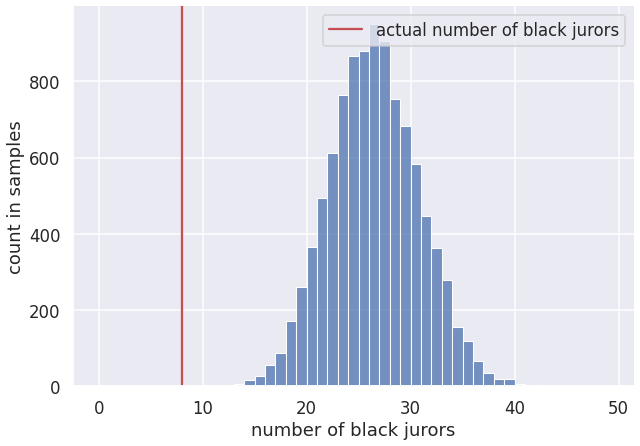

In [ ]:
#@title Sampling distribution - amount of black jurors in 10,000 samples of the jury from 26% black population
# Show bootstrapping of the mean percentage in a random sample of jurors from a population of 26% black people. Show in a red line the real value measured in Talladega (8%).
# print the p-value for this value to actually occur.
# code to simulate the statistic

population = ['black', 'other']
prob_population = [0.26, 0.74]
panel_size = 100

def sample_jury_panel():
    sample_panel = np.random.choice(population, p=prob_population, size = panel_size)
    num_black_jury = np.count_nonzero(sample_panel == 'black')
    return num_black_jury

num_repetitions = 10000
num_black_array = np.zeros(num_repetitions)
for i in range(num_repetitions):
    num_black_array[i] = sample_jury_panel()
    
ax = sns.displot(num_black_array, kde=False, bins=np.arange(0,50,1), height=6,aspect=1.5);
ax.set(xlabel='number of black jurors', ylabel='count in samples');
plt.axvline(x=8, color='r', linestyle='-', label = "actual number of black jurors");
print("Chances to get 8% (or less) black jurors on a random sample is:", stats.percentileofscore(num_black_array,8))
plt.legend();

#Slide 13: So how to separate between two distributions?

# Slide 14: What are the important parameters for separating these two normal distributions?

<Figure size 432x288 with 0 Axes>

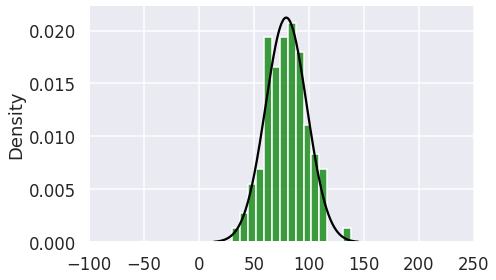

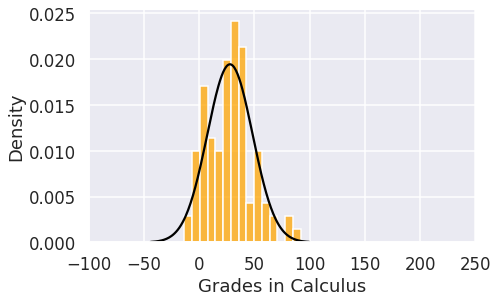

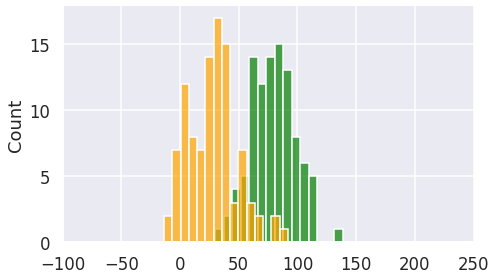

In [ ]:
#@title Two samples from different populations change parameters below and run again!
# Show a graph with two Normal distributions. Let them play with the mean and std of the two distributions. (here is a partially good example: https://rpsychologist.com/d3/cohend/)

######### change parameters below to play with the distributions
meanA = 80 #@param {type:"slider", min:20, max:100}
stdA = 20 #@param {type:"slider", min:20, max:60}
meanB = 30 #@param {type:"slider", min:20, max:100}
stdB=20 #@param {type:"slider", min:20, max:60}

distA = np.random.normal(meanA, stdA, 100)
distB = np.random.normal(meanB, stdB, 100)
######
plt.figure(0)
plot_dist(distA, bins=15,color="green", kde=False, fit="Normal", height=4, aspect=1.7);
plt.xlim(-100,250);
plt.figure(1);
plot_dist(distB, bins=15,color="orange", kde=False, fit="Normal", height=4, aspect=1.7);
plt.xlim(-100,250);
plt.xlabel('Grades in Calculus');
plt.figure(2);
sns.displot(distA,bins=15,alpha=0.7, color="green",height=4, aspect=1.7);
sns.histplot(distB,bins=15,alpha=0.7, color="orange");
plt.xlim(-100,250);


#Slide 15: To estimate our ability to separate between two distributions we will have two important parameters:
## 1. The ***p-value*** which indicates how probable is the result given that I think the two distributions are the same (in "mathy" notation this is - P(data|H0)).
## 2. The ***effect size*** which indicates how far the two distributions are in units of their standard deviation

## Both measures are important when we want to estimate if two distributions are different from one another or not

# Slide 16: What kind of errors can we get when we try to estimate if the samples are different or not?

# Slide 17: First type of error, is to think that two samples are different when actually they come from the same distribution

In [ ]:
#@title type I error - wrong rejection of H0 - we think there's an effect but there isn't
# Example of two close by distributions, show/highlight the type I error
def changeAlpha(alpha=0.05): 
  ######### change parameters below to play with the distributions
  meanA = 80
  stdA = 10
  meanB = 100
  stdB=10
  #########
  np.random.seed(2)
  distA = np.random.normal(meanA, stdA, 200)
  distB = np.random.normal(meanB, stdB, 200)
  typeI = np.percentile(distA,100-alpha*100) #the x value of the 95th percentile in distribution 1, under which we will get unsignificant result
  ######
  plt.figure(figsize=(8,6))
  ##plot the two distributions and create fit
  x_min = 30.0;x_max = 150
  mean = np.mean(distA) ; std = np.std(distA)
  xA = np.linspace(x_min, x_max, 1000)
  yA = stats.norm.pdf(xA,mean,std)
  plt.plot(xA, yA)

  x_min = 30.0;x_max = 150
  mean = np.mean(distB) ; std = np.std(distB)
  xB = np.linspace(x_min, x_max, 1000)
  yB = stats.norm.pdf(xB,mean,std)
  plt.plot(xB,yB)
  pdf_typeI = stats.norm.pdf(typeI,np.mean(distA),np.std(distA)) ##pdf value of the critical x score
  plt.fill_between(xA[xA>=typeI], yA[xA>=typeI], facecolor='blue', alpha=0.5)
  plt.xlabel('Grades in Calculus');
  plt.ylabel('Probability Density');
  #plt.ylim(0,max(yB)*1.1)
  plt.axvline(x=typeI, ymin=0,ymax=pdf_typeI/(1.1*max(yB)), color='black', linestyle='--');
  plt.text(74,0.035,'$H_0$\n no effect \n(true state)',horizontalalignment='right');
  plt.text(107,0.035,'$H_1$\n there is an effect \n(wrong conclusion)',horizontalalignment='left');
  plt.title("Chances for thinking there's an effect when there isn't:");
_=interact(changeAlpha, alpha=(0.01,0.2,.01))

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.2, min=0.01, step=0.01), Output()), _…

# Slide 18: Second type of error, is to think that the two distributions come from the same distribution, when actually they are different and come from different distributions

In [ ]:
#@title type II error - missing the effect when it's there
# Example of two close by distributions, show/highlight the type II error

def changeAlphaII(alpha=.05):
  ######### change parameters below to play with the distributions
  meanA = 80
  stdA = 10
  meanB = 100
  stdB=10
  #########
  np.random.seed(2)
  distA = np.random.normal(meanA, stdA, 100) ##null hypothesis distribution
  distB = np.random.normal(meanB, stdB, 100) 
  typeII = np.percentile(distA,100-alpha*100) #the x value of the 95th percentile in distribution 1, under which we will get unsignificant result
  ######

  # print(typeII);
  plt.figure(figsize=(8,6))

  x_min = 30.0;x_max = 150
  mean = np.mean(distA) ; std = np.std(distA)
  xA = np.linspace(x_min, x_max, 1000)
  yA = stats.norm.pdf(xA,mean,std)
  plt.plot(xA, yA)

  x_min = 30.0;x_max = 150
  mean = np.mean(distB) ; std = np.std(distB)
  xB = np.linspace(x_min, x_max, 1000)
  yB = stats.norm.pdf(xB,mean,std)
  plt.plot(xB,yB)
  pdf_typeII = stats.norm.pdf(typeII,np.mean(distB),np.std(distB))
  plt.ylim=(0,max(yB)*1.1)

  yAB = [yA,yB]

  # print(len(yAB[0]))
  yMin = np.array([min(yAB[0][i],yAB[1][i]) for i in range(len(yAB[0]))])
  plt.fill_between(xB[xB<=typeII],yB[xB<=typeII], facecolor='coral', alpha=0.5)

  plt.xlabel('Grades in Calculus');
  plt.ylabel('Probability Density');

  plt.axvline(x=typeII, ymin=0,ymax=pdf_typeII/(1.1*max(yB)), color='black', linestyle='--');
  plt.text(74,0.032,'$H_0$\n no effect \n(wrong conclusion)',horizontalalignment='right');
  plt.text(107,0.032,'$H_1$\n there is an effect \n(true state)',horizontalalignment='left');
  plt.title("Chances for thinking there's no effect when actually there is one:");
_=interact(changeAlphaII, alpha=(0.01,0.2,.01))

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.2, min=0.01, step=0.01), Output()), _…

# Slide 19: Question - How can we control these errors?

In [ ]:
#@title
# Example of two close by distributions that are sampled, students can control the number of samples taken from each distribution, the alpha parameter, the mean, and the variance of each distribution


def controlErrors(meanA = 80,stdA = 80,nsampleA=400,meanB = 90,stdB=80,nsampleB =400):
  A = np.random.normal(meanA, stdA, nsampleA)
  B = np.random.normal(meanB, stdB, nsampleB)
  plt.figure(1);
  df=pd.DataFrame({"Grade":np.concatenate([A,B]),
                   "group":np.concatenate([np.repeat("A",nsampleA),np.repeat("B",nsampleB)])})
  sns.displot(df,x="Grade", bins=10,hue="group", kde=1, height=5, aspect=1.5);
  plt.xlabel('Observations');
  plt.ylabel('Probability Density');
  plt.title("Two samples from different (but close) distributions")
  #########
  np.random.seed(2)
  bootRuns = 1000 ##how many samples in the bootstrapping
  sampling_distA = np.array([])
  sampling_distB = np.array([])

  for i in range(bootRuns):
    sampleA = np.random.choice(A,nsampleA)
    sampling_distA = np.append(sampling_distA, np.mean(sampleA))

    
  for i in range(bootRuns):
    sampleB = np.random.choice(B,nsampleB)
    sampling_distB = np.append(sampling_distB, np.mean(sampleB))

  plt.figure(2);
  df2=pd.DataFrame({"Grade":np.concatenate([sampling_distA,sampling_distB]),
                   "group":np.concatenate([np.repeat("A",bootRuns),np.repeat("B",bootRuns)])})
  sns.displot(df2,x="Grade", bins=25,hue="group", kde=1,height=5, aspect=1.5);

  plt.axvline(x=np.mean(sampling_distA),color="darkgreen");
  plt.axvline(x=np.mean(sampling_distB),color="red");

  plt.xlabel('Mean values');
  plt.ylabel('Probability Density');
  plt.title('\n\nBootstrap Distribution of Means');

  #print("effect size:",abs((np.mean(sampling_distA)-np.mean(sampling_distB))/(.5*np.std(sampling_distA)+.5*np.std(sampling_distB))))
  #print("p-value:",stats.ttest_ind(sampling_distA,sampling_distB).pvalue)
  
  print("effect size:",np.round(abs((np.mean(A)-np.mean(B))/np.sqrt((nsampleA-1)*np.var(A)+(nsampleB-1)*np.var(B)/(nsampleA+nsampleB-2))),3))
  print("p-value:",np.round(stats.ttest_ind(A,B).pvalue,3)) 

_=interact(controlErrors,meanA = (60,100),stdA = (1,30),
           nsampleA=(20,400,10),meanB = (60,100),stdB=(1,30),nsampleB =(20,400,10))

interactive(children=(IntSlider(value=80, description='meanA', min=60), IntSlider(value=30, description='stdA'…

## Question 4: Which of the following sentences is true?
### A. Increasing the number of observations increases the p-value
### B. Increasing the number of observations increases the chance for a type I error
### C. Increasing the number of observations decreases the chance for a type II error
### D. Increasing the number of observations increases the effect size
### E. All of the above, classic answer

## Question 5: What is the important parameter to differentiate between two distributions:
### A. The number of observations we take from each distribution, duh
### B. Of course it is the difference between their means
### C. It depends on the variance of each distribution
### D. All of the above, classic answer